Anılkağan Kantar
ETM 58D
Homework 4

In [ ]:
# install.packages("factoextra")

library("tidyverse")
library("factoextra")
library("openxlsx")

#import movie names and ratings

movieNames <- read.csv("G:/Gdrive/ETM/ETM_58D/HW4/HW4_data/ETM58D_Spring22_HW4_movie_titles.txt", sep="|", header=FALSE) #name separator necessary, otherwise movie names gets seperated
movieRatings <- read.table("G:/Gdrive/ETM/ETM_58D/HW4/HW4_data/ETM58D_Spring22_HW4_Netflix_data.dat")

#scale and get calculate distance
movieRatings <- scale(movieRatings)
distance <- get_dist(movieRatings)

#Plot a cluster graph

set.seed(123)
km.res <- kmeans(movieRatings, 4, nstart = 25)

fviz_cluster(km.res, data = movieRatings,
             palette = c("#00AFBB","#2E9FDF", "#E7B800", "#FC4E07"),
             ggtheme = theme_minimal(),
             main = "Partitioning Clustering Plot",
             geom = "point")

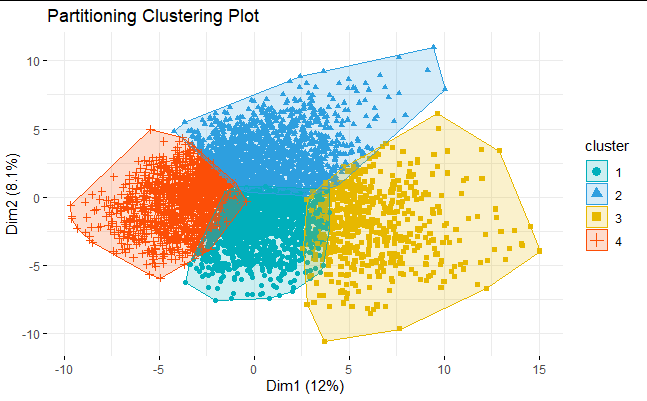

In [ ]:
#Apply hierarchical clustering. Ward method will be used while others are for curiosities sake.

movieHCWard <- hclust(distance, method = "ward.D2")
plot(movieHCWard)


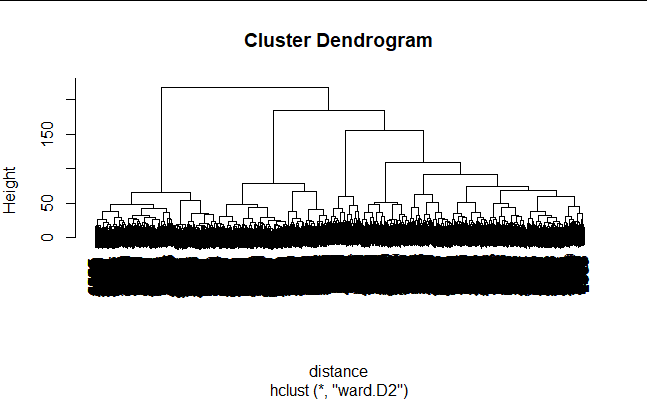

In [ ]:
movieHCAvg <- hclust(distance, method = "average")

plot(movieHCAvg)


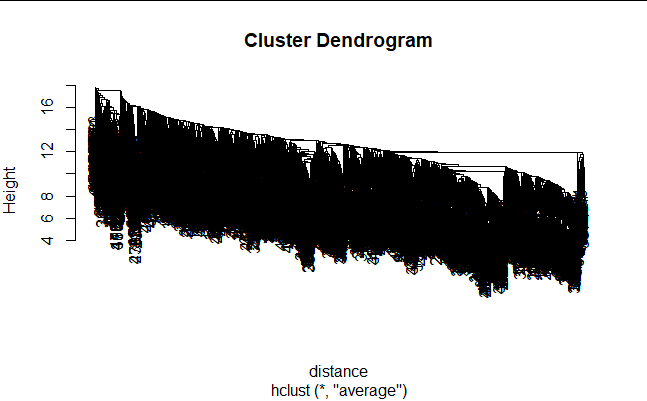

In [ ]:

movieHCComp <- hclust(distance, method = "complete")
plot(movieHCComp)

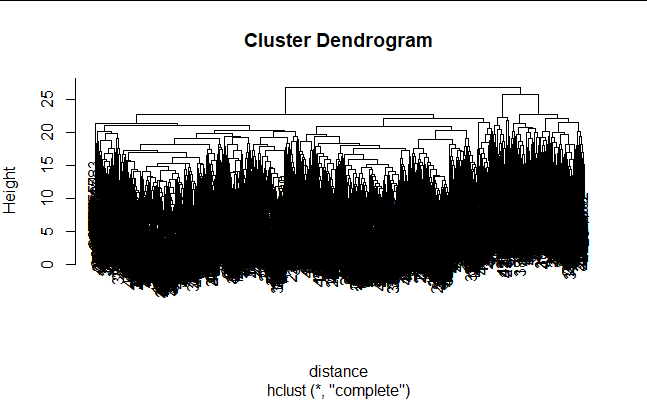

Results of different calculations methods can be seen in dendrogram. We will utilize Ward method going forward.

In [ ]:
#determine the optimum number of clusters

fviz_nbclust(movieRatings, kmeans, method = "wss")

fviz_nbclust(movieRatings, kmeans, method = "silhouette")

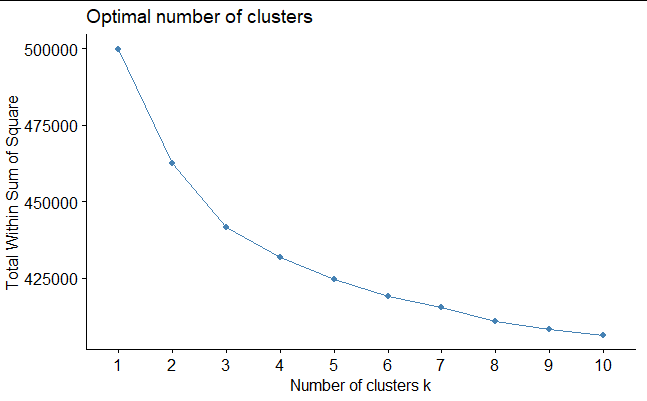

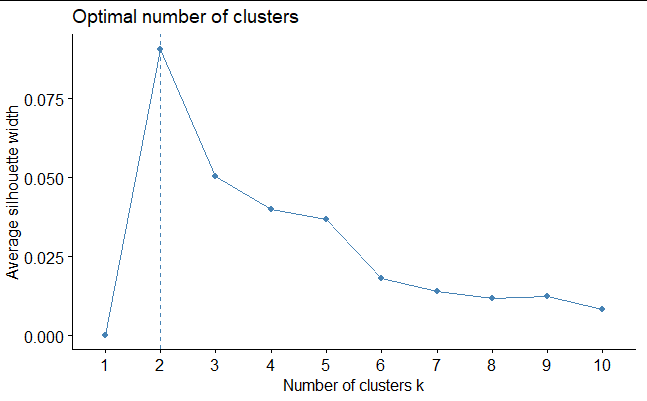

Silhouette method shows optimum number of clusters to be 2. Wehn we inspect the graph generated by WSS method, improvement going from 2 to 3 clusters seems to be approx. %5.6. Which also indicates 2 clusters should be good enough.

In [ ]:
#ideal number of clusters seems to be 2 per silhoutte method. Show it on the dendrogram.

plot(movieHCWard)
rect.hclust(movieHCWard, k = 2, border = 2:5)


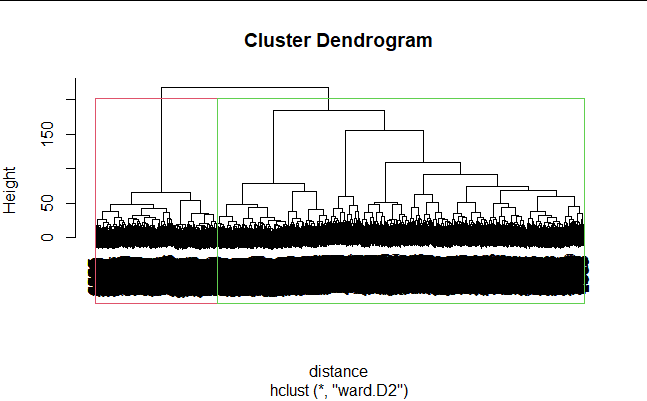

2 clusters are shown on the dendrogram